In [91]:
pip install wordcloud nltk matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
import nltk
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

In [93]:
file_path = '/kaggle/input/eda-dataset/cleanedDataset2.csv'
df = pd.read_csv(file_path)
df

,Thought,Label
0,everyon probabl mad,negative
1,braver believ,positive
2,open eye want see,positive
3,clearli dont want friend anymor,negative
4,never done befor,negative
...,...,...
151643,believ fast time fli,negative
151644,eat spici food,negative
151645,itâ ok screw up nigel raw,positive
151646,itâ here itâ beauti itâ sign fit right in,positive


In [94]:
df.describe()

,Thought,Label
count,151648,151648
unique,124042,2
top,pleas help,positive
freq,46,83154


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151648 entries, 0 to 151647
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Thought  151648 non-null  object
 1   Label    151648 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [96]:
df.shape

(151648, 2)

In [97]:
df.isnull().sum()

Thought    0
Label      0
dtype: int64

In [98]:
df['sentence_length'] = df['Thought'].apply(len)

In [99]:
df

,Thought,Label,sentence_length
0,everyon probabl mad,negative,19
1,braver believ,positive,13
2,open eye want see,positive,17
3,clearli dont want friend anymor,negative,31
4,never done befor,negative,16
...,...,...,...
151643,believ fast time fli,negative,20
151644,eat spici food,negative,14
151645,itâ ok screw up nigel raw,positive,25
151646,itâ here itâ beauti itâ sign fit right in,positive,41


# Find the minimum and maximum sentence length and the corresponding sentence

In [101]:
min_length = df['sentence_length'].min()
min_sentence = df[df['sentence_length'] == min_length]['Thought'].iloc[0]

max_length = df['sentence_length'].max()
max_sentence = df[df['sentence_length'] == max_length]['Thought'].iloc[0]

print(f"Minimum sentence length: {min_length}")
print(f"Sentence with minimum length: {min_sentence}\n")
print(f"Maximum sentence length: {max_length}")
print(f"Sentence with maximum length: {max_sentence}")


Minimum sentence length: 4
Sentence with minimum length: peac

Maximum sentence length: 590
Sentence with maximum length: slate pick best book michael agger associ editorlik good liber art major use read great gatsbi everi year got old though switch richard ford sportswrit novel introduc frank bascomb fail novelist adrift fog subyou areban detach charact bascomb charm paradox thought guy tri fit thoughtless exist in new jersey less everyman particular sens modern male often fumbl attempt embrac normalci lay land third bascomb book frank reappear fine rumin form novel spill drivebi philosophi conjecty are bullshit despit iron john moment bounc ford prose though backyard trampolin feel weightless alivemor


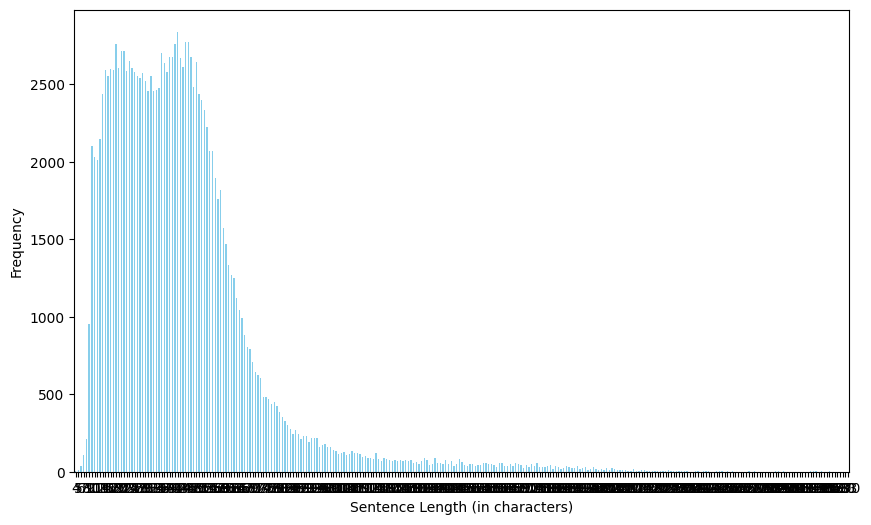

In [107]:
# Count the frequency of each sentence length
length_counts = df['sentence_length'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
length_counts.plot(kind='bar', color='skyblue')
# plt.title('Frequency of Sentence Lengths')
plt.xlabel('Sentence Length (in characters)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


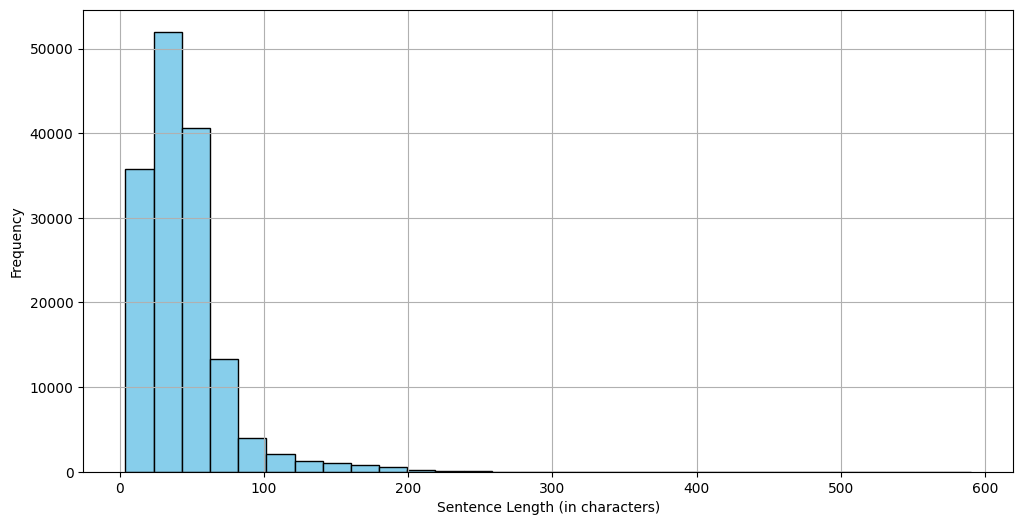

In [108]:
import matplotlib.pyplot as plt

# Plot histogram of sentence lengths
plt.figure(figsize=(12, 6))
plt.hist(df['sentence_length'], bins=30, color='skyblue', edgecolor='black')
# plt.title('Histogram of Sentence Lengths')
plt.xlabel('Sentence Length (in characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

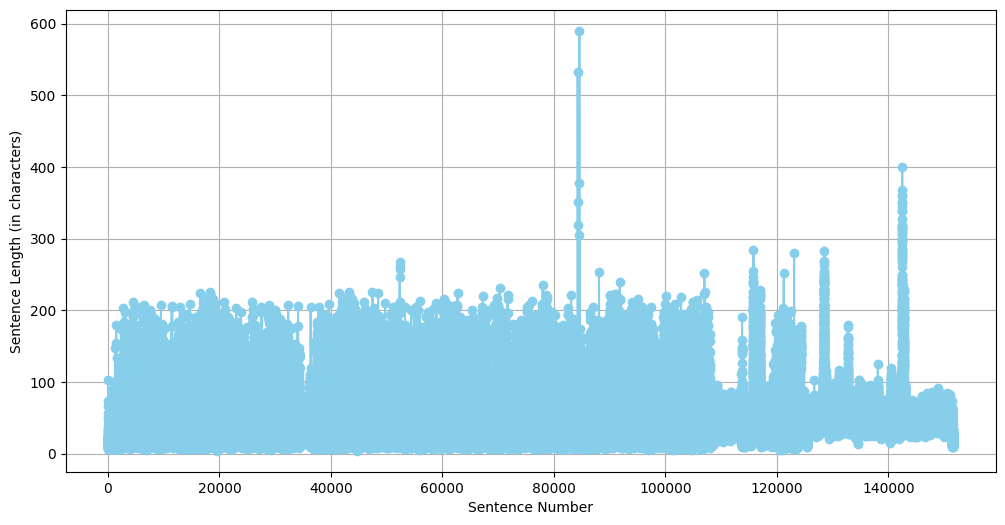

In [109]:
import matplotlib.pyplot as plt

# Plot line graph of sentence lengths
plt.figure(figsize=(12, 6))
plt.plot(df['sentence_number'], df['sentence_length'], marker='o', linestyle='-', color='skyblue')
# plt.title('Line Graph of Sentence Lengths by Sentence Number')
plt.xlabel('Sentence Number')
plt.ylabel('Sentence Length (in characters)')
plt.grid(True)
plt.show()

# Distribution of Labels

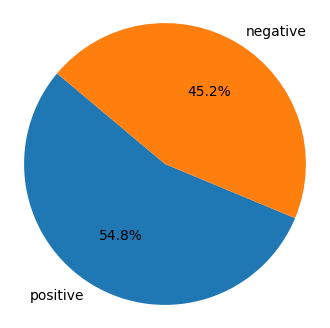

In [111]:
label_counts = df['Label'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

## Exploratory Data Analysis
 
### Counts and Lenght:
Start by checking how long the reviews are
* Character count
* Word count
* Mean word length
* Mean sentence length

In [117]:
lenght = len(str(df['Thought'][0]))
print(f'Length of a sample thought: {lenght}')

Length of a sample thought: 19


In [118]:
df['Length'] = df['Thought'].str.len()
df.head(10)

,Thought,Label,sentence_length,sentence_number,Length
0,everyon probabl mad,negative,19,1,19
1,braver believ,positive,13,2,13
2,open eye want see,positive,17,3,17
3,clearli dont want friend anymor,negative,31,4,31
4,never done befor,negative,16,5,16
5,complic,negative,7,6,7
6,resoy arec,negative,10,7,10
7,lazi get done,negative,13,8,13
8,radic chang,negative,11,9,11
9,one bother commun me,negative,20,10,20


#### **Word Count**: Number of words in a thought

In [116]:
word_count = str(df['Thought'][0]).split()
print(f'Word count in a sample thought: {len(word_count)}')

Word count in a sample thought: 3


In [119]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [120]:
df['Word_count'] = df['Thought'].apply(word_count)
df.head(10)

,Thought,Label,sentence_length,sentence_number,Length,Word_count
0,everyon probabl mad,negative,19,1,19,3
1,braver believ,positive,13,2,13,2
2,open eye want see,positive,17,3,17,4
3,clearli dont want friend anymor,negative,31,4,31,5
4,never done befor,negative,16,5,16,3
5,complic,negative,7,6,7,1
6,resoy arec,negative,10,7,10,2
7,lazi get done,negative,13,8,13,3
8,radic chang,negative,11,9,11,2
9,one bother commun me,negative,20,10,20,4


#### **Mean word length**: Average length of words

In [121]:
df['mean_word_length'] = df['Thought'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head(10)

,Thought,Label,sentence_length,sentence_number,Length,Word_count,mean_word_length
0,everyon probabl mad,negative,19,1,19,3,5.666667
1,braver believ,positive,13,2,13,2,6.000000
2,open eye want see,positive,17,3,17,4,3.500000
3,clearli dont want friend anymor,negative,31,4,31,5,5.400000
4,never done befor,negative,16,5,16,3,4.666667
5,complic,negative,7,6,7,1,7.000000
6,resoy arec,negative,10,7,10,2,4.500000
7,lazi get done,negative,13,8,13,3,3.666667
8,radic chang,negative,11,9,11,2,5.000000
9,one bother commun me,negative,20,10,20,4,4.250000


#### **Mean sentence length**: Average length of the sentences in the review

In [122]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Thought'][0])])

19.0

In [123]:
df['mean_sent_length'] = df['Thought'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head(10)

,Thought,Label,sentence_length,sentence_number,Length,Word_count,mean_word_length,mean_sent_length
0,everyon probabl mad,negative,19,1,19,3,5.666667,19.0
1,braver believ,positive,13,2,13,2,6.000000,13.0
2,open eye want see,positive,17,3,17,4,3.500000,17.0
3,clearli dont want friend anymor,negative,31,4,31,5,5.400000,31.0
4,never done befor,negative,16,5,16,3,4.666667,16.0
5,complic,negative,7,6,7,1,7.000000,7.0
6,resoy arec,negative,10,7,10,2,4.500000,10.0
7,lazi get done,negative,13,8,13,3,3.666667,13.0
8,radic chang,negative,11,9,11,2,5.000000,11.0
9,one bother commun me,negative,20,10,20,4,4.250000,20.0


In [124]:
def visualize(df, col):
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Label', y=col, data=df)
    plt.xlabel('Label', labelpad=12.5)
    plt.ylabel(col, labelpad=12.5)
    plt.title(f'Boxplot of {col} by Label')
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=col, hue='Label', common_norm=False)
    plt.xlabel(col, labelpad=12.5)
    plt.ylabel('Density', labelpad=12.5)
    plt.title(f'Distribution of {col} by Label')
    
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

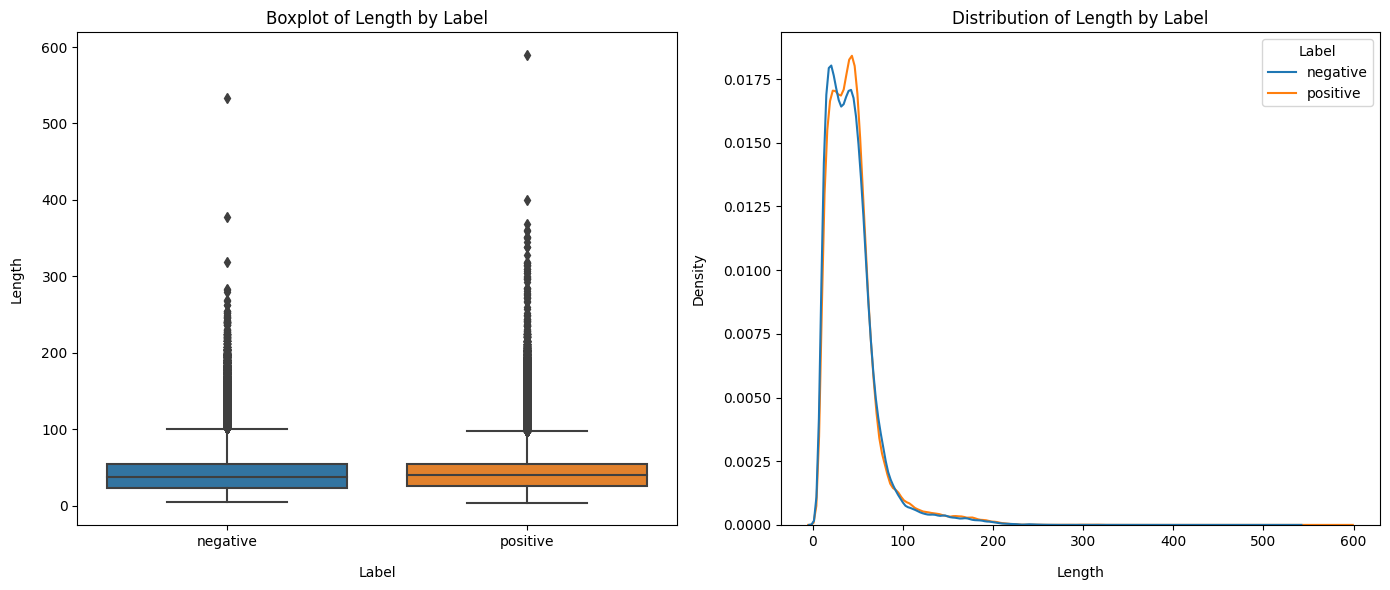

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

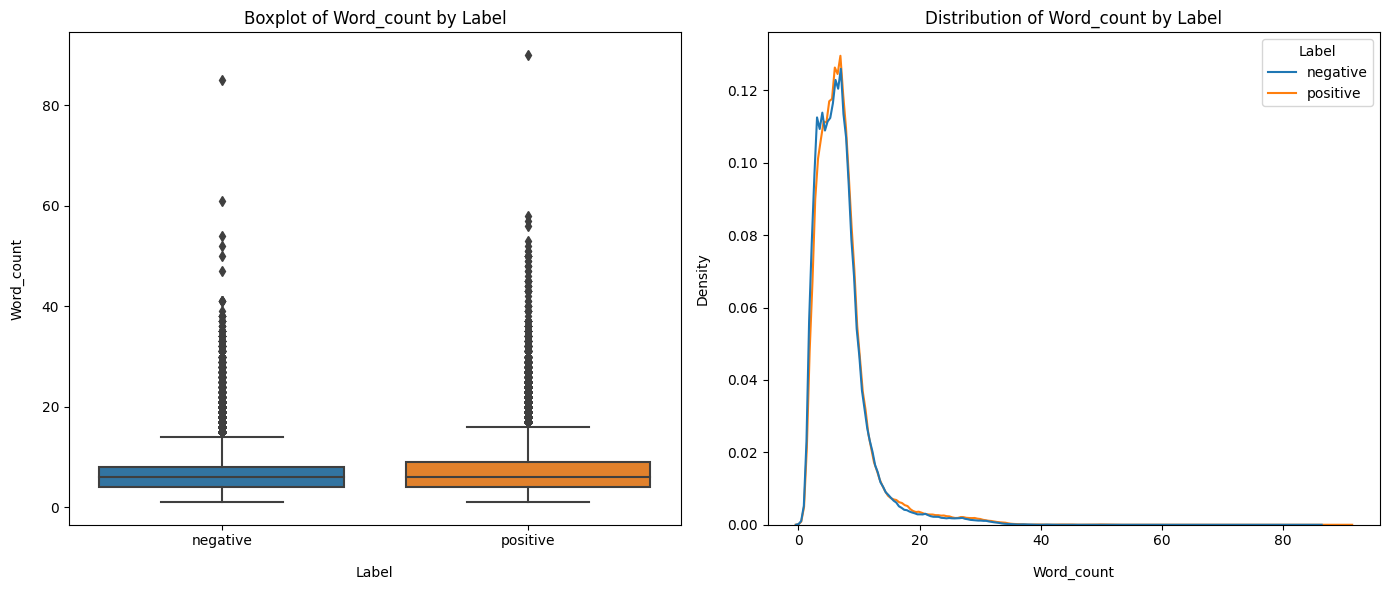

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

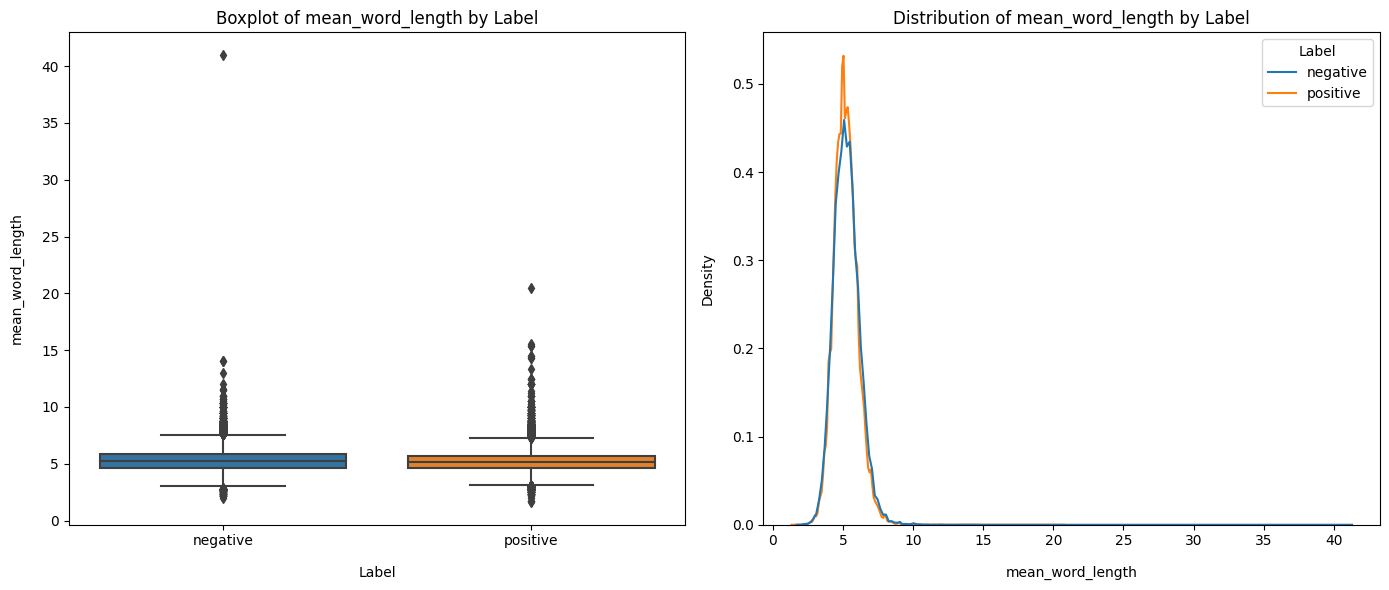

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

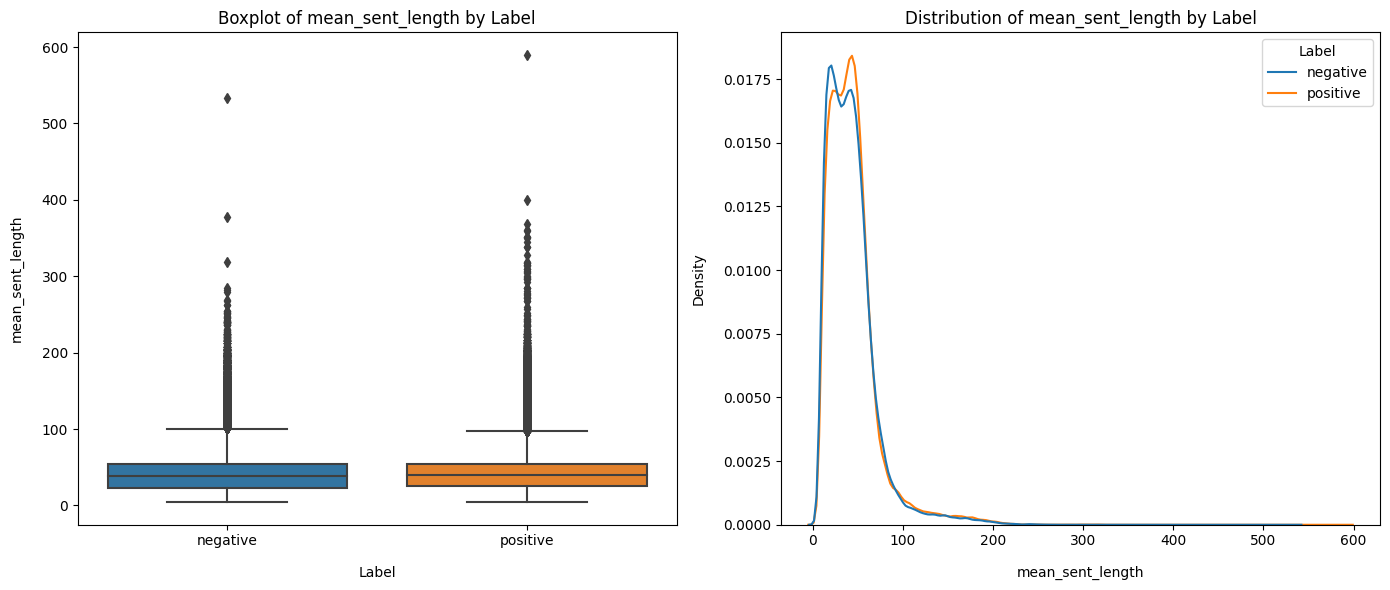

In [125]:
features = ['Length', 'Word_count', 'mean_word_length', 'mean_sent_length']
for feature in features:
    visualize(df, feature)

## Term Frequency Analysis
Examining the most frequently occuring words is one of the most popular systems of Text analytics. For example, in a sentiment analysis problem, a positive text is bound to have words like 'good', 'great', 'nice', etc. more in number than other words that imply otherwise.

*Note*: Term Frequencies are more than counts and lenghts, so the first requirement is to preprocess the text

In [126]:
df = df.drop(features, axis=1)
df.head()

,Thought,Label,sentence_length,sentence_number
0,everyon probabl mad,negative,19,1
1,braver believ,positive,13,2
2,open eye want see,positive,17,3
3,clearli dont want friend anymor,negative,31,4
4,never done befor,negative,16,5


There is no missing data, therefore, we can move to the next stage. For Term frequency analysis, it is essential that the text data be preprocessed.
* Lowercase
* Remove punctutations
* Stopword removal

In [127]:
print(df.head(10))

                           Thought     Label  sentence_length  sentence_number
0              everyon probabl mad  negative               19                1
1                    braver believ  positive               13                2
2                open eye want see  positive               17                3
3  clearli dont want friend anymor  negative               31                4
4                 never done befor  negative               16                5
5                          complic  negative                7                6
6                       resoy arec  negative               10                7
7                    lazi get done  negative               13                8
8                      radic chang  negative               11                9
9             one bother commun me  negative               20               10


In [128]:
df['Thought'][0]

'everyon probabl mad'

In [129]:
def corpus(text):
    text_list = text.split()
    return text_list

In [130]:
df['Review_lists'] = df['Thought'].apply(corpus)
df.head(10)

,Thought,Label,sentence_length,sentence_number,Review_lists
0,everyon probabl mad,negative,19,1,"[everyon, probabl, mad]"
1,braver believ,positive,13,2,"[braver, believ]"
2,open eye want see,positive,17,3,"[open, eye, want, see]"
3,clearli dont want friend anymor,negative,31,4,"[clearli, dont, want, friend, anymor]"
4,never done befor,negative,16,5,"[never, done, befor]"
5,complic,negative,7,6,[complic]
6,resoy arec,negative,10,7,"[resoy, arec]"
7,lazi get done,negative,13,8,"[lazi, get, done]"
8,radic chang,negative,11,9,"[radic, chang]"
9,one bother commun me,negative,20,10,"[one, bother, commun, me]"


In [131]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 151648/151648 [00:01<00:00, 92821.05it/s]


1083478

In [132]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('are', 11135),
 ('yoyou', 6702),
 ('like', 6667),
 ('feel', 5973),
 ('help', 5633),
 ('make', 5619),
 ('life', 4655),
 ('other', 4060),
 ('get', 4055),
 ('love', 3971)]

In [133]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


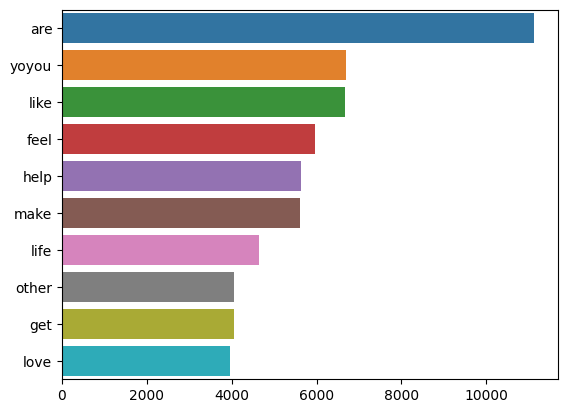

In [135]:
sns.barplot(x=freq, y=words)
# plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

## Most Frequently occuring N_grams

**What is an N-gram?** <br>
An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.
<br>
> A **Bi-gram** means two words in a sequence. 'Very good' or 'Too great'<br>
> A **Tri-gram** means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.<br>

For separating text into n-grams, we will use `CountVectorizer` from Sklearn

In [136]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Thought'])

In [137]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

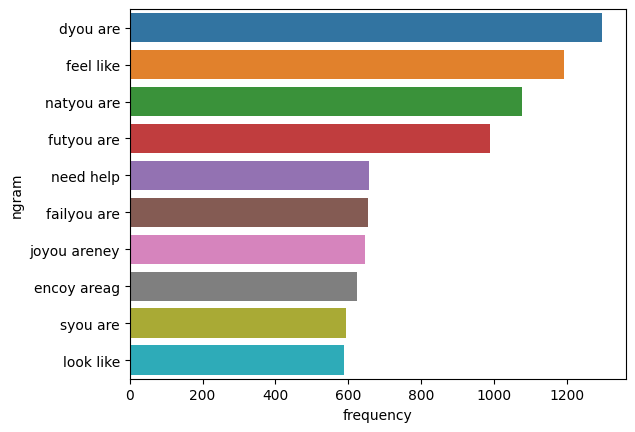

In [138]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
# plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [139]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Thought'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

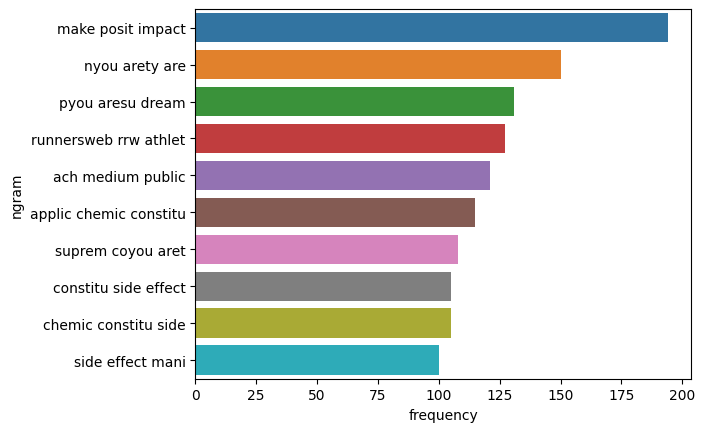

In [140]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
# plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

Word Clouds

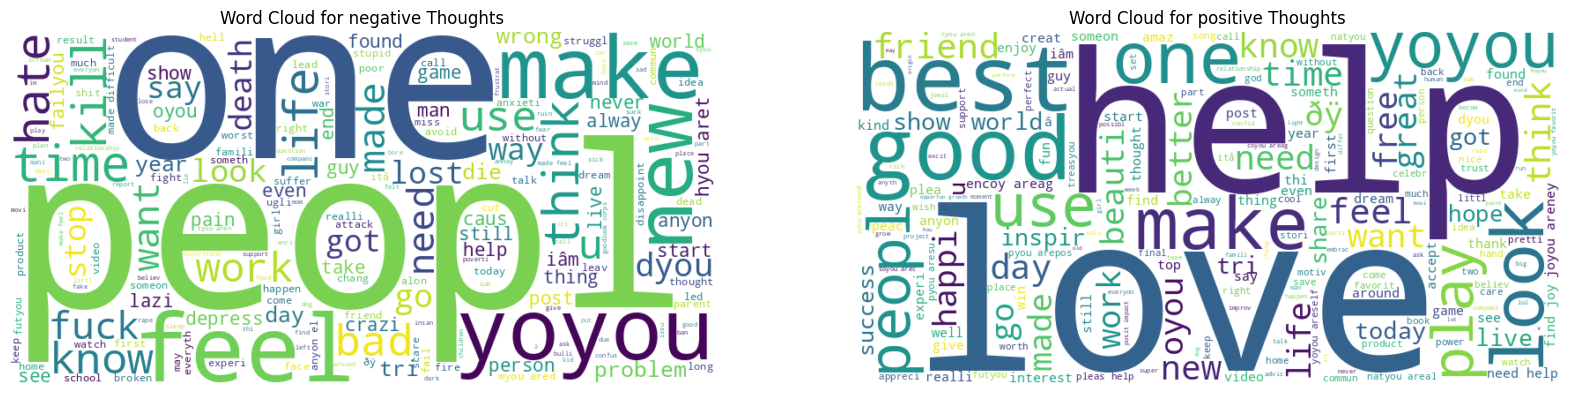

In [141]:
def generate_wordcloud(label):
    text = " ".join(thought for thought in df[df['Label'] == label]['Thought'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud
labels = df['Label'].unique()
fig, axes = plt.subplots(1, len(labels), figsize=(20, 10))
for ax, label in zip(axes, labels):
    wordcloud = generate_wordcloud(label)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Word Cloud for {label} Thoughts")
    ax.axis('off')
plt.show()